## Lab 04: State of the Union Addresses (1/2)

In this lab we will begin working the transcripts of the State of the Union addresses. These speeches are a grand tradition with historical significance in the United States. In this first lab, we will do some simple analysis to parse the addresses by breaking them up into sentences. We will then look at the trends in the data, and do a little detective work to understand how the addresses have evolved over the years. 

In terms of technical and programming content, this lab will continue some of the skills we began developing in previous labs, including regular expressions, string splitting, and so on. We will also briefly discuss the `json` data format, which is very commonly used for unstructured data like text. We'll also take a closer look at the supremely handy `print` function.

Disclaimer: The addresses themselves are of course political events, and trigger political commentary. We'll focus on programming and the analysis of data rather than politics.

<br>



In [1]:
from datascience import *
import numpy as np
import re

# direct plots to appear within the cell, and set their style
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')


A `json`, which stands for [Javascript Object Notation](https://en.wikipedia.org/wiki/JSON), is format that is essentially a dictionary of key-value pairs, but it allows nesting. Here is an excerpt from the SOTU data we'll be using.

```
{
   "date": "2017-02-28",
   "president": "Donald J. Trump",
   "title": "Address Before a Joint Session of the Congress",
   "url": "http://www.presidency.ucsb.edu/ws/index.php?pid=123408",
   "transcript": "Thank you very much. Mr. Speaker, Mr. Vice President, Members of Congress, the First Lady of the United States, and citizens of America: Tonight, as we mark the conclusion of our celebration of Black History Month, we are reminded of our Nation's path towards civil rights and the work that still remains to be done. Recent threats targeting Jewish community centers and vandalism of Jewish cemeteries, as well as last week's shooting in Kansas City, remind us that while we may be a nation divided on policies, we are a country that stands united in condemning hate and evil in all of its very ugly forms. Each American generation passes the torch of truth, liberty, and justice in an unbroken chain, all the way down to the present. That torch is now in our hands, and we will use it to light up the world. I am here tonight to deliver a message of unity and strength, and it is a message deeply delivered from my heart.
```

Let's read this in with the `json` package and load the meta-data and transcript for each speech into a `Table`

In [2]:
import json
with open('transcripts.json') as f:
    data = json.load(f)

In [3]:
# np.arange(len(data))

In [4]:
import datetime

dates = []
presidents = []
transcripts = []
years = []

for a in np.arange(len(data)):
    dates.append(data[a]['date'])
    presidents.append(data[a]['president'])
    transcripts.append(data[a]['transcript'])
    year = datetime.datetime.strptime(data[a]['date'], "%Y-%m-%d").year
    years.append(year)

speeches = Table().with_columns('Date', dates, 'Year', years, 'President', presidents, 'Transcript', transcripts)
speeches = speeches.sort('Date', descending=True)
speeches.show(16)

Date,Year,President,Transcript
2019-02-05,2019,Donald J. Trump,"Madam Speaker, Mr. Vice President, Members of Congress, ..."
2018-01-30,2018,Donald J. Trump,"Mr. Speaker, Mr. Vice President, Members of Congress, th ..."
2017-02-28,2017,Donald J. Trump,"Thank you very much. Mr. Speaker, Mr. Vice President, Me ..."
2016-01-12,2016,Barack Obama,"Thank you. Mr. Speaker, Mr. Vice President, Members of C ..."
2015-01-20,2015,Barack Obama,"The President. Mr. Speaker, Mr. Vice President, Members ..."
2014-01-28,2014,Barack Obama,"The President. Mr. Speaker, Mr. Vice President, Members ..."
2013-02-12,2013,Barack Obama,"Please, everybody, have a seat. Mr. Speaker, Mr. Vice Pr ..."
2012-01-24,2012,Barack Obama,"Mr. Speaker, Mr. Vice President, Members of Congress, di ..."
2011-01-25,2011,Barack Obama,"Mr. Speaker, Mr. Vice President, Members of Congress, di ..."
2010-01-27,2010,Barack Obama,"Madam Speaker, Vice President Biden, Members of Congress ..."


Let's print out the first 500 characters of several speeches, just get an idea of what the data look like.
We'll use the `print` statement which takes the form `print(format % tuple)` where `format` is a string that specifies the format of `n` entries to be printed, and `tuple` is an `n` tuple of values. Some basic types are `%s` for string, `%d` for integer, and `%f` for float.  The statement `print('%s, %s!' % ('hello', 'world'))` will print `hello, world!`


In [5]:
# np.arange(0, speeches.num_rows, 4)

In [6]:
for s in np.arange(0, speeches.num_rows, 4):
    print("%s: %s \n\n%s...\n" % \
          (speeches.column('Date')[s], speeches.column('President')[s], speeches.column('Transcript')[s][0:500]))
    # print first 500 characters of transcript


2019-02-05: Donald J. Trump 

Madam Speaker, Mr. Vice President, Members of Congress, the First Lady of the United States, and my fellow Americans: We meet tonight at a moment of unlimited potential. As we begin a new Congress, I stand here ready to work with you to achieve historic breakthroughs for all Americans. Millions of our fellow citizens are watching us now, gathered in this great chamber, hoping that we will govern not as two parties but as one Nation. The agenda I will lay out this evening is not a Republican agen...

2015-01-20: Barack Obama 

The President. Mr. Speaker, Mr. Vice President, Members of Congress, my fellow Americans: We are 15 years into this new century. Fifteen years that dawned with terror touching our shores, that unfolded with a new generation fighting two long and costly wars, that saw a vicious recession spread across our Nation and the world. It has been and still is a hard time for many. But tonight we turn the page. Tonight, after a breakthrough yea

In [7]:
import datetime

def parse_into_sentences(transcript):
    import re
    transcript = transcript.replace("Mr.", "Mr").replace("Mrs.", "Mrs").replace("Ms.","Ms")
    pattern = re.compile(r'([A-Z][^\.!?]*[\.!?])')#??
    sentences = pattern.findall(transcript)
    return(sentences)

def longest_sentence(sentences):
    import numpy as np
    lengths = [len(re.split(r'\s', sentences[s])) for s in range(len(sentences))]
    s = np.argmax(lengths)
    return(sentences[s]) #longest sentence

def show_longest(s):
    print("%s: %s\n" % (speeches.column('President')[s], speeches.column('Date')[s]))
    sents = parse_into_sentences(speeches.column('Transcript')[20])#??
    longest = longest_sentence(sents)
    print(longest)

In [8]:
lengths = []
years = []
longest = []

for s in np.arange(speeches.num_rows):
    sentences = parse_into_sentences(speeches.column('Transcript')[s])
    long_sent = longest_sentence(sentences)
    lengths.append(len(sentences))
    longest.append(len(re.split(r'\s', long_sent))) #just in case someone put two spaces there
    
sotu = speeches.with_columns('Length', lengths, 'Longest', longest)
#number of words in the longest sentence - longest
sotu.show(25)

Date,Year,President,Transcript,Length,Longest
2019-02-05,2019,Donald J. Trump,"Madam Speaker, Mr. Vice President, Members of Congress, ...",295,59
2018-01-30,2018,Donald J. Trump,"Mr. Speaker, Mr. Vice President, Members of Congress, th ...",316,55
2017-02-28,2017,Donald J. Trump,"Thank you very much. Mr. Speaker, Mr. Vice President, Me ...",583,52
2016-01-12,2016,Barack Obama,"Thank you. Mr. Speaker, Mr. Vice President, Members of C ...",714,51
2015-01-20,2015,Barack Obama,"The President. Mr. Speaker, Mr. Vice President, Members ...",748,77
2014-01-28,2014,Barack Obama,"The President. Mr. Speaker, Mr. Vice President, Members ...",770,67
2013-02-12,2013,Barack Obama,"Please, everybody, have a seat. Mr. Speaker, Mr. Vice Pr ...",724,76
2012-01-24,2012,Barack Obama,"Mr. Speaker, Mr. Vice President, Members of Congress, di ...",834,68
2011-01-25,2011,Barack Obama,"Mr. Speaker, Mr. Vice President, Members of Congress, di ...",789,65
2010-01-27,2010,Barack Obama,"Madam Speaker, Vice President Biden, Members of Congress ...",853,69


In [9]:
sotu = sotu.sort('Year', descending=False)
sotu

Date,Year,President,Transcript,Length,Longest
1790-12-08,1790,George Washington,Fellow-Citizens of the Senate and House of Representativ ...,76,86
1790-01-08,1790,George Washington,Fellow-Citizens of the Senate and House of Representativ ...,48,124
1791-10-25,1791,George Washington,Fellow-Citizens of the Senate and House of Representativ ...,110,89
1792-11-06,1792,George Washington,Fellow-Citizens of the Senate and House of Representativ ...,120,88
1793-12-03,1793,George Washington,Fellow-Citizens of the Senate and House of Representativ ...,108,95
1794-11-19,1794,George Washington,Fellow-Citizens of the Senate and House of Representativ ...,156,97
1795-12-08,1795,George Washington,Fellow-Citizens of the Senate and House of Representativ ...,100,129
1796-12-07,1796,George Washington,Fellow-Citizens of the Senate and House of Representativ ...,158,115
1797-11-22,1797,John Adams,Gentlemen of the Senate and Gentlemen of the House of Re ...,118,107
1798-12-08,1798,John Adams,Gentlemen of the Senate and Gentlemen of the House of Re ...,116,141


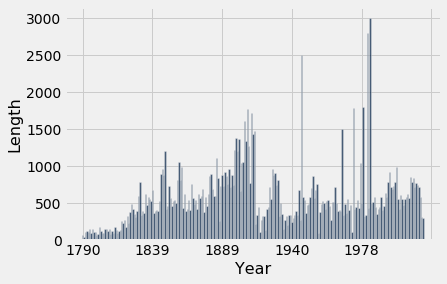

In [10]:
sotu.bar('Year', 'Length')

Let's get the plot to look a little nicer.

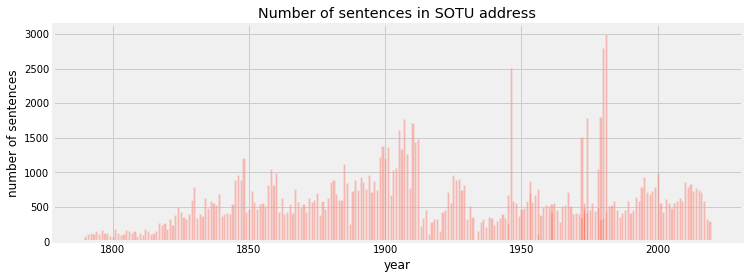

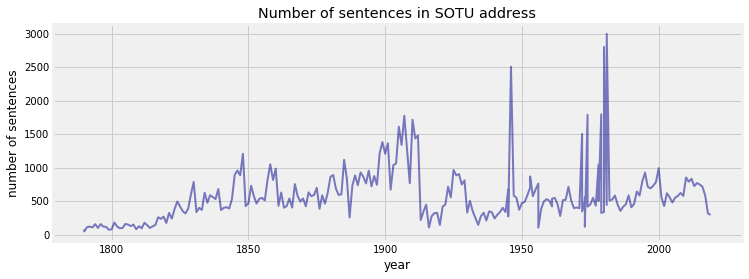

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

# bar plot
fig = plt.figure()
fig.set_size_inches(11,4)
plt.bar(sotu.column('Year'), sotu.column('Length'), align='center', alpha=0.5, color='salmon')
plt.xlabel('year')
plt.ylabel('number of sentences')
plt.title('Number of sentences in SOTU address')
plt.show()

#line plot
fig = plt.figure()
fig.set_size_inches(11,4)
plt.plot(sotu.column('Year'), sotu.column('Length'), alpha=0.5, color='darkblue', linewidth=2)
plt.xlabel('year')
plt.ylabel('number of sentences')
plt.title('Number of sentences in SOTU address')
plt.show()


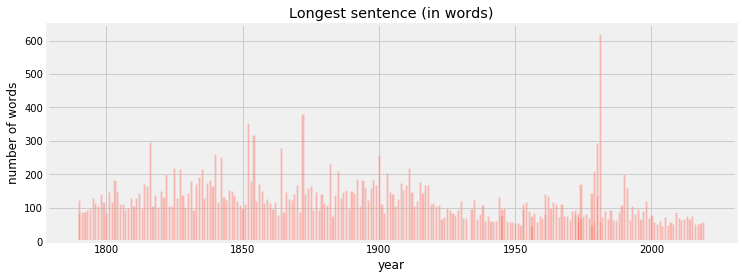

In [12]:
fig = plt.figure()
fig.set_size_inches(11,4)
plt.bar(sotu.column('Year'), sotu.column('Longest'), align='center', alpha=0.5, color='salmon')
plt.xlabel('year')
plt.ylabel('number of words')
plt.title('Longest sentence (in words)')
plt.show()

## What's going on?

The trends in the lengths of the SOTUs are a little strange. Can we figure out what's going on? Let's do some detective work. 

You can check out this [SOTU history page from the House of Representatives](https://history.house.gov/Institution/SOTU/State-of-the-Union/) to get some information. For instance, we find these fun facts:

### Technological Change
* First radio broadcast of Message: President Calvin Coolidge, 1923.
* First television broadcast of Message: President Harry Truman, 1947.
* First televised evening delivery of Message: President Lyndon Johnson, 1965.
* First live webcast on Internet: President George W. Bush, 2002.
* First high definition television broadcast of Message, President George W. Bush, 2004.


### Record Holders
* The longest: President James Earl (Jimmy) Carter 33,667 words in 1981 (written). President William J. (Bill) Clinton 9,190 words in 1995 (spoken).
* The shortest: President George Washington, 1790, 1,089 words.
* Average length: 19th century was about 10,000 words; late 20th century, about 5,000 words.
* Most Messages/Addresses given: President Franklin Roosevelt, 12 (10 were personal appearances before Congress).
* Fewest Messages/Addresses given: President Zachary Taylor; President William Henry Harrison; President James A. Garfield.


See if you can explain the trends in the plot of the lengths of the SOTU address by year, based on these web pages that describe the SOTU history.

We can see from the plot of number of sentences in SOTU history that there was a significant decrease around 1920. From the histroy, there's first radio broadcast of message happends in 1923. That may explain why it started to become shorter because a larger range of Americans were able to listen. Starting in 1923, the president may have had to worry about appealing to a larger audience, the common people, if you will. Taking away some outliers in the 1900s, this seems to set the trend for shorter speeches. This trend seems to have been reset with the first live webcast in 2002.

## War and Peace

*Your turn!*  Your task is to now take this code, and write a function `def mentions_of_word(word)` which does the following:

* Goes through each transcript, finding all matches of the word `word`.
* Assigns an array `count` with these `word` counts.
* Forms a table with a command `speeches.with_column('Count', count)`
* Generates a plot of the count of `word` by year, using a command as used above, like this:

```
    fig = plt.figure()
    fig.set_size_inches(11,4)
    plt.bar(sotu.column('Year'), sotu.column('Count'), align='center', alpha=0.5, color='salmon')
    plt.xlabel('year')
    plt.ylabel('count')
    plt.title('Mentions of "%s"' % word)
    plt.show()
```

After all of this is working, generate several groups of plots of what you imagine to be related words, and comment on the trends that you see in the data. For example, you could run

```
    for word in ['war', 'peace', 'arms']:
        mentions_of_word(word)
```
followed by some commentary on the plots in a markdown cell.

* Finally, change the function to take several words as input, and plot the counts of all of them together. Specifically, write a function `def mentions_of_words(words)` that calls that function `plt.plot` for each column of a table that has word counts for each word in the list (or set) `words`. An example plotting function is shown below.


**Have fun!**

<br>


In [19]:
def mentions_of_word(word):
    # Goes through each transcript, finding all matches of the word word
    # Assigns an array count with these word counts
    import re
    count = []
    for s in np.arange(speeches.num_rows):
        all = re.findall('\s%s\s' % word,speeches.column('Transcript')[s])
        # print(all)
        # print(len(all))
        count.append(len(all))
        
    # Forms a table with a command speeches.with_column('Count', count)
    count_table = speeches.with_columns('Count', count)
    count_table.show(25)
    
    # Generates a plot of the count of word by year, using a command as used above, like this:
    fig = plt.figure()
    fig.set_size_inches(11,4)
    plt.bar(count_table.column('Year'), count_table.column('Count'), align='center', alpha=0.5, color='salmon')
    plt.xlabel('year')
    plt.ylabel('count')
    plt.title('Mentions of "%s"' % word)
    plt.show()

Date,Year,President,Transcript,Count
2019-02-05,2019,Donald J. Trump,"Madam Speaker, Mr. Vice President, Members of Congress, ...",2
2018-01-30,2018,Donald J. Trump,"Mr. Speaker, Mr. Vice President, Members of Congress, th ...",2
2017-02-28,2017,Donald J. Trump,"Thank you very much. Mr. Speaker, Mr. Vice President, Me ...",4
2016-01-12,2016,Barack Obama,"Thank you. Mr. Speaker, Mr. Vice President, Members of C ...",8
2015-01-20,2015,Barack Obama,"The President. Mr. Speaker, Mr. Vice President, Members ...",4
2014-01-28,2014,Barack Obama,"The President. Mr. Speaker, Mr. Vice President, Members ...",12
2013-02-12,2013,Barack Obama,"Please, everybody, have a seat. Mr. Speaker, Mr. Vice Pr ...",4
2012-01-24,2012,Barack Obama,"Mr. Speaker, Mr. Vice President, Members of Congress, di ...",6
2011-01-25,2011,Barack Obama,"Mr. Speaker, Mr. Vice President, Members of Congress, di ...",4
2010-01-27,2010,Barack Obama,"Madam Speaker, Vice President Biden, Members of Congress ...",3


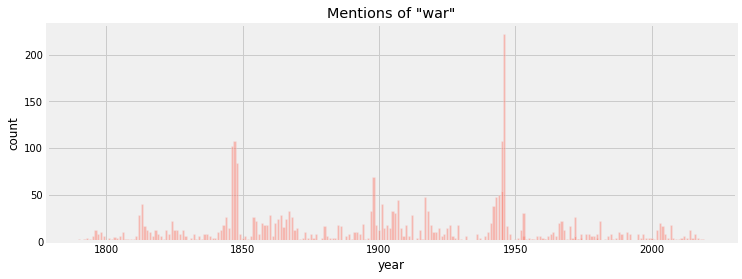

Date,Year,President,Transcript,Count
2019-02-05,2019,Donald J. Trump,"Madam Speaker, Mr. Vice President, Members of Congress, ...",2
2018-01-30,2018,Donald J. Trump,"Mr. Speaker, Mr. Vice President, Members of Congress, th ...",0
2017-02-28,2017,Donald J. Trump,"Thank you very much. Mr. Speaker, Mr. Vice President, Me ...",2
2016-01-12,2016,Barack Obama,"Thank you. Mr. Speaker, Mr. Vice President, Members of C ...",0
2015-01-20,2015,Barack Obama,"The President. Mr. Speaker, Mr. Vice President, Members ...",0
2014-01-28,2014,Barack Obama,"The President. Mr. Speaker, Mr. Vice President, Members ...",6
2013-02-12,2013,Barack Obama,"Please, everybody, have a seat. Mr. Speaker, Mr. Vice Pr ...",0
2012-01-24,2012,Barack Obama,"Mr. Speaker, Mr. Vice President, Members of Congress, di ...",0
2011-01-25,2011,Barack Obama,"Mr. Speaker, Mr. Vice President, Members of Congress, di ...",2
2010-01-27,2010,Barack Obama,"Madam Speaker, Vice President Biden, Members of Congress ...",4


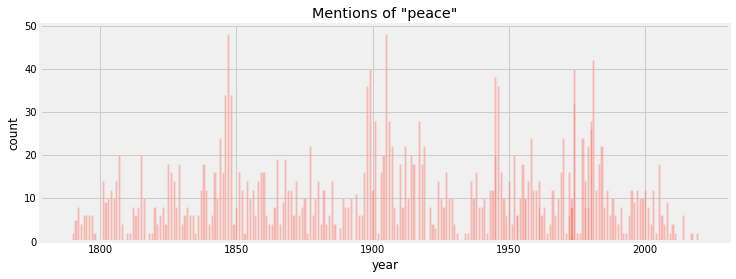

In [20]:
#After all of this is working, generate several groups of plots of what you imagine to be related words, and comment on the trends that you see in the data. 
for word in ['war', 'peace']:
    mentions_of_word(word)

We can see that around 1846-1847, around 1900, right before 1950 and around 1970, the "war" and "peace" two words were mentioned frequently and we found the following fact to explain them.  

(1) Mexican–American War was an armed conflict between the United States and Mexico from 1846 to 1848.  

(2) The Spanish–American War was an armed conflict between Spain and the United States in 1898. Philippine–American War lasted from 1899 and ended in 1913.  

(3) During 1941–1945 was World War II. During the war some 16 million Americans served in the United States Armed Forces, with 405,399 killed in action and 671,278 wounded. From 1945-1964 was post-war era. The Marshall Plan helped Western Europe rebuild from wartime devastation.  

(4) 1973 – The Paris Peace Accords ends direct U.S. involvement in the Vietnam War.  

People went through wars and looked forward to peace.

We are going to change the function to take several words as input, and plot the counts of all of them together. Specifically, write a function def mentions_of_words(words) that calls that function plt.plot for each column of a table that has word counts for each word in the list (or set) words. An example plotting function is shown below.

In [21]:
from datascience import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def mentions_of_words(wordcombo):
    
    import re
    fig = plt.figure()
    fig.set_size_inches(12,8)

    for word in wordcombo:
        #print(word)
        count = []
        for s in np.arange(speeches.num_rows):
            all = re.findall('\s%s\s' % word,speeches.column('Transcript')[s])
            count.append(len(all))
        count_table = speeches.with_columns('Count', count)
        plt.plot(count_table.column('Year'), count_table.column('Count'), alpha= 0.5, linewidth=2)
    plt.xlabel('year')
    plt.ylabel('count')
    plt.title('Words count comparison')
    plt.legend(wordcombo)
    plt.show()

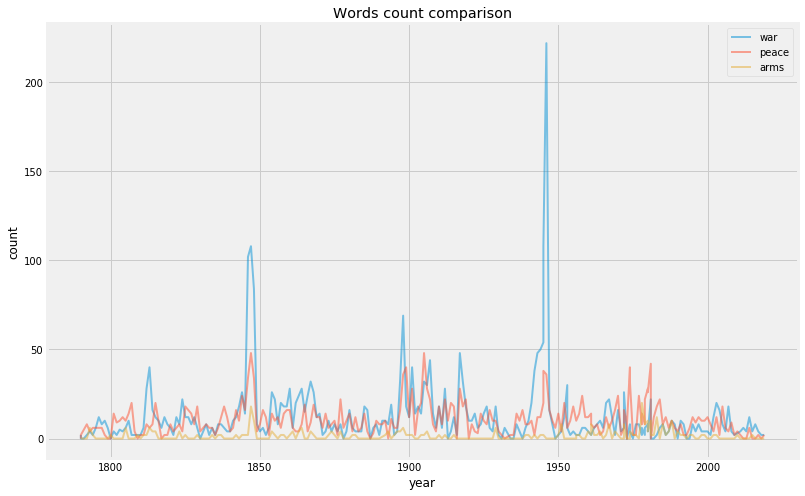

In [22]:
word_combo = ['war', 'peace','arms']
mentions_of_words(word_combo)

## Appendix

Here is a little example of plotting a bunch of curves together. (Other examples can be found in the [YData](http://ydata123.org/sp19) materials, for example in the book section on [overlaid graphs](https://www.inferentialthinking.com/chapters/07/3/Overlaid_Graphs).)

theta,sin(x),cos(x),sin(2x),cos(2x)
-4,0.756802,-0.653644,-0.494679,-0.07275
-3.9,0.687766,-0.725932,-0.499272,0.0269777
-3.8,0.611858,-0.790968,-0.48396,0.12563
-3.7,0.529836,-0.8481,-0.449354,0.219274
-3.6,0.44252,-0.896758,-0.396834,0.304176
-3.5,0.350783,-0.936457,-0.328493,0.376951
-3.4,0.255541,-0.966798,-0.247057,0.434699
-3.3,0.157746,-0.98748,-0.155771,0.475116
-3.2,0.0583741,-0.998295,-0.0582746,0.496592
-3.1,-0.0415807,-0.999135,0.0415447,0.498271


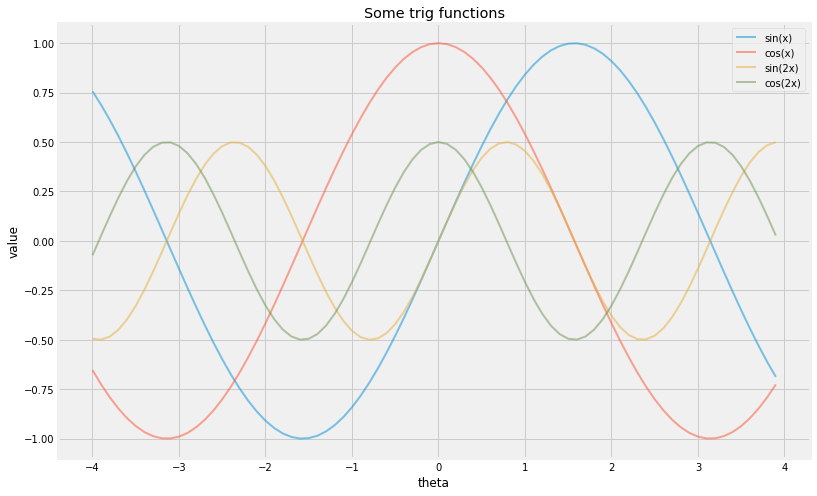

In [17]:
from datascience import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

theta = np.arange(-4,4,.1)
cos = np.cos(theta)
sin = np.sin(theta)
cos2 = .5*np.cos(2*theta)
sin2 = .5*np.sin(2*theta)
table = Table().with_columns('theta', theta, 'sin(x)', sin, 'cos(x)', cos, 'sin(2x)', sin2, 'cos(2x)', cos2)
table.show(10)

fig = plt.figure()
fig.set_size_inches(12,8)
cols = {'sin(x)', 'cos(x)', 'sin(2x)', 'cos(2x)'}
for col in cols:
        plt.plot(table.column('theta'), table.column(col), alpha= 0.5, linewidth=2)
plt.xlabel('theta')
plt.ylabel('value')
plt.title('Some trig functions')
plt.legend(cols)
plt.show()